# Tugas Pendata-Implementasikan Sklearn DT-PCA pada data iris

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/jennamacwe/Pendata/main/iris.csv')
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['class'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [ ]:
df.columns

Index(['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'class'], dtype='object')

In [ ]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

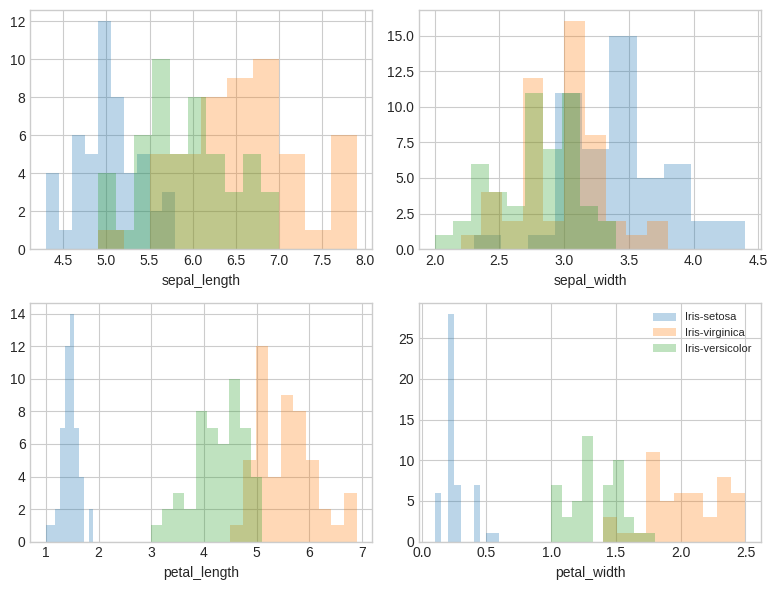

In [ ]:
label_dict={1: 'Iris-setosa',
           2: 'Iris-virginica',
           3: 'Iris-versicolor'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('Iris-setosa','Iris-virginica','Iris-versicolor'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [ ]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)

Covariance Matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


**melakukan eigendecomposition pada matriks kovarian :**

In [ ]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.93035378 0.92740362 0.14834223 0.02074601]


# **Matriks Kolerasi**

In [ ]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


# **Eigendecomposition dari data mentah berdasarkan matriks korelasi**

In [ ]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


# **Dekomposisi Nilai Tunggal**

**sebagian besar implementasi PCA melakukan Singular Value Decomposition (SVD) untuk meningkatkan efisiensi komputasional**

In [ ]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

# **Mengurutkan Eigenpair**

In [ ]:
# memastikan panjang eigenvector = 1.0

for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072249
0.1473532783050959
0.020607707235624884


# **menghitung “individual explained variance” dan “cumulative explained variance” berdasarkan eigenvalues yang telah diurutkan**

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

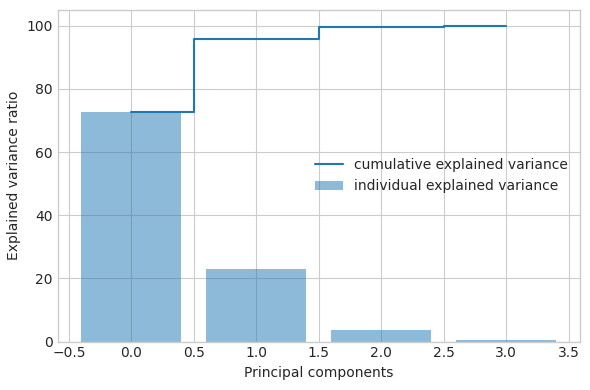

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# **Matriks proyeksi**

yang akan digunakan untuk mentransformasikan data Iris ke dalam subspace fitur baru

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


# **Proyeksi Ke Ruang Fitur Baru**

In [ ]:
Y = X_std.dot(matrix_w)

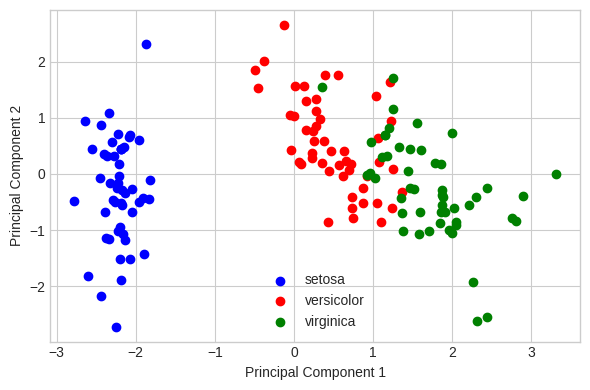

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# **Penerapan PCA dalam scikit-learn**

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

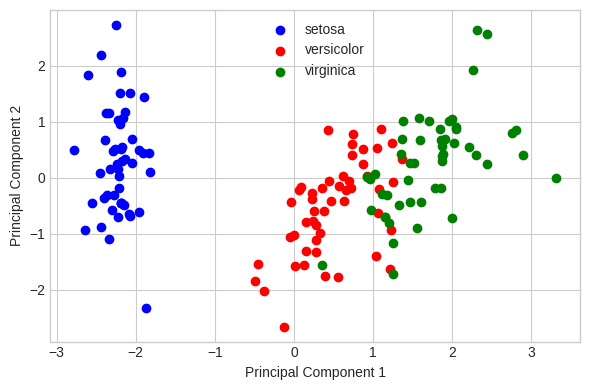

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

In [ ]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [ ]:
data['class']=df['class']
data

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


In [ ]:
df = data
df

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


In [ ]:
df['class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
df.isnull().sum()

X          0
Y          0
species    0
dtype: int64

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21)

In [ ]:
X_train.shape, X_test.shape

((100, 2), (50, 2))

In [ ]:
X_train.dtypes

X    float64
Y    float64
dtype: object

In [ ]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
encoder = ce.OrdinalEncoder(cols=["X","Y"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,X,Y
52,1,1
49,2,2
65,3,3
118,4,4
55,5,5


In [ ]:
X_test.head()

,X,Y
92,-1.0,-1.0
44,-1.0,-1.0
7,-1.0,-1.0
21,-1.0,-1.0
95,-1.0,-1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=21)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=21)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.36


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virg

In [ ]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.50


In [ ]:
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.50
Test set score: 0.36


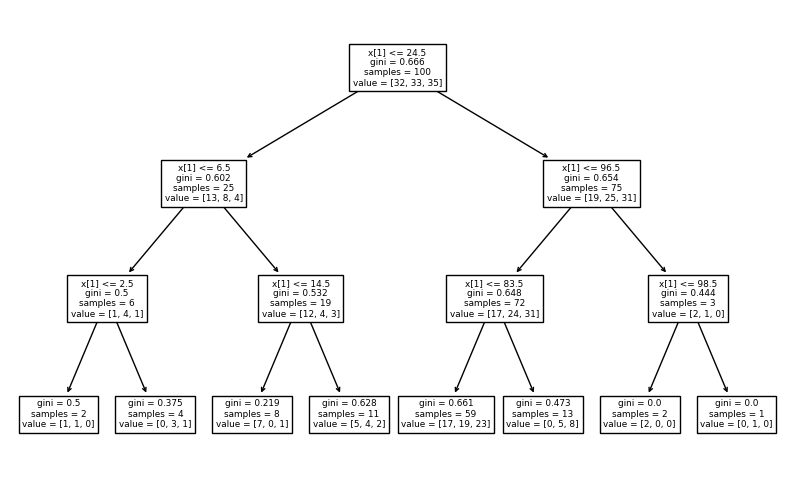

In [ ]:
plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()